Week 4: Multiple Linear Regression and Regression in Practice
=========

## **Notebook Overview**

This notebook is available on github
[here](https://github.com/Yushi-Y/AAS-ongoing-tutorials). If you find
errors or would like to suggest an improvement then let me know.

This week is all about applying regression in practice! Those of you who were not enjoying the heavy maths will be pleased that this is a far more practical session. You have 9 questions about running regression models but really it is one big question with many parts. Note that this is a really useful lesson for working out when a regression model might have some red flags. Try to realise why the 9 questions are linked.

### **Additional Resources**

1. **[General statsmodels documentation](https://www.statsmodels.org/dev/api.html):** A little bit about the documentation of statsmodels and why we import it in the way we do. You will need to know about the '.ols' extension of smf for this tutorial [(details here)](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html). Information is available via the link. Note that there are lots of other valid ways to do regression in statsmodels and other libraries but this is quite a neat way. Also in the same style as R for those of you who have used it.

2. **[Unbelievably helpful statsmodels regression documentation](https://www.statsmodels.org/dev/example_formulas.html):** This shows how to write regression formula in this R-style. It has all of the different documentation for categorical variables, higher-order terms, interactions...etc. Really good resource.

3. **[Useful Ben Lambert Videos:](https://www.youtube.com/playlist?list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU)** There are quite a lot this week so I've listed them all below. Many of these are repeats from past notebooks or the content should have been covered in class anyway.

  **Level 1: Strongly recommend**
      * [Interpreting regression coefficients in MLR](https://www.youtube.com/watch?v=JwGaos2Y9bM&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=99&t=259s): Gold. A little bit mathematical but stick with it. Really important to know.
      * [Dummy Variables:](https://www.youtube.com/watch?v=s7EyQwJahgw&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=103) Nice. Good introduction to dummies/binary variables/dichotomous variables.
      * [Interactions:](https://www.youtube.com/watch?v=HyA_Vgbc0t4&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=105) Really good to watch if confused about interaction terms.
      * [$R^2$](https://www.youtube.com/watch?v=QQQz0qefj2c&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=71). There is a part 1, part 2 and a video about adjusted $R^2$. Part 1 is well worth a watch. Quite mathematica but you'll pick up the general idea. Part 2 might be more useful than part 1 as it is about the problems with using $R^2$ and why you mighjt want to consider adjusted $R^2$. Note that the problems with $R^2$ are really well known so if you fall into this trap, it'll be quite obvious to the examiner!

  **Level 2: Good to know**
      * [Dummies and Interactions:](https://www.youtube.com/watch?v=ScKL40dp8M4&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=104) A little more complex but still good. Adam covered this in class but might have been complex.
      * [Interpreting regression coefficients in log-transformed models](https://www.youtube.com/watch?v=aXBFKKh54Es&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=100&t=89s): Hint: MAY be useful for one the questions later... The video is pretty mathsy so many of you might not be able to follow it. BUT the conclusions and interpretation (i.e. the rule to follow) is not difficult so persist with it but don't get bogged down.

  **Level 3: If time**
      * [Multicollinearity](https://www.youtube.com/watch?v=O4jDva9B3fw&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=61): A more advanced topic. Useful to know about but I come onto it near the end if you have time.
      * [The population regression function:](https://www.youtube.com/watch?v=oFaoCzj3YUY&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=30) What I bang on about in class i.e. using a model to estimate the population function. Notation is a bit different to what I use so don't get too confused by new notation.

4. **[Wooldridge Econometrics:](https://www.academia.edu/44467534/ECONOMETRICS_A_Modern_Approach) [Good resource for really understanding the mathematical theory in depth]**

5. **Fox Textbook:** **[Good resource for really understanding the mathematical theory in depth]**

As usual we will start by importing some useful libraries.

In [1]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import os.path as path

In this notebook we will also use an additional module, `heatmap`, which
provides a function for drawing heatmaps of the correlations between columns of
a pandas dataframe. If you have downloaded this code from GitHub you should
already have the file, if you are using Colab, the following will download a
copy of into your session.

We're going to import a function called correlatoin_heatmap which we made in a python file.

In [12]:
if path.exists('heatmap.py'):
    from heatmap import correlation_heatmap
else:
    import requests
    heatmap_py_url = 'https://raw.githubusercontent.com/Yushi-Y/AAS-ongoing-tutorials/main/W4-Multiple_Linear_Regression/heatmap.py'
    req = requests.get(heatmap_py_url)
    with open('urlheatmap.py', 'w') as f:
        f.write(req.text)
    from urlheatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this
notebook we will be looking at the miles per gallon (MPG) achieved by these cars
based on some features of the cars and where/when they were produced. The
`origin` of origin of the car is encoded as an integer, (recall you can use the
`dtypes` method to see this). The representation of the data is clearer by
mapping it to a string describing the origin.

In [13]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/Yushi-Y/AAS-ongoing-tutorials/main/W4-Multiple_Linear_Regression/data-auto.csv'
df = pd.read_csv(data_csv)

In [14]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [15]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7]

A heatmap of the correlations between the variables in the data is a good way to
get a feel for the data.

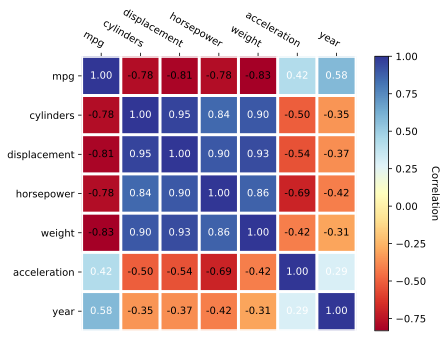

In [16]:
# use the imported function to visualize this.
correlation_heatmap(df[numeric_cols])
plt.show()

In [17]:
# We can also get a feel for the relationships by comparing the scatters.
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

### Question 1

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`?
How do they relate to `mpg`?

### Answer

### Question 2

What are the benefits of the heatmap? What are the benefits of the scatter? Why are the useful when viewed together? What important information cannot be deciphered by these?

### Answer

### Question 3

Fit an ordinary linear regression for the MPG using all of the variables
(excluding the name of the car). Print a summary of the fitted model. Comment on
the results, how has the MPG changed over time? Save the fitted model as
`fit_1`, note the `1`, we are going to improve on this below.

### Answer

### Question 4

Plot the residuals against the fitted values, what do you notice? Remember the definition of the resiudals from the lecture.

Hint: It relates to your fitted regression model.

Hint 2: It might be useful to first look up what the fitted value is, what the residual is and why we might want to plot them against each other.

### Answer

### Question 5

If we assume that this is a good model, what does the model tell us about fuel efficiency across the years? Hint: recall how to interpret regression coefficients.

### Question 6

Apply some transformations to reduce non-linearity in the relationship between the regressors and the response variable.

Hint: Look at the scatter plot to see where there might be non-linearities, then try to adjust the regressors so that the relationships are linear. Note that it might be helpful to adjust the variables and then plot the scatterplot again to see how the relationships have changed. Are they linear now?

Hint 2: It might be helpful to go back through the lecture notes and see what type of transformations can be applied.

### Answer


### Question 7

Re-fit the model (as `fit_2`) with the transformed variables and comment on what
has changed with the model outputs. Also plot the residuals as you did before. Are there improvements?

### Answer

### Question 8

Hint: The correct approach in the questions before was to log-transform some of the variables. Now, imagine that you called the log-transformed variables ln_variable_name, remove the `ln_displacement` variable and create a new model `fit_3`. Comment on how the model has changed. Again, consider a plot of the residuals.

### Answer


### Question 9

In a new model, `fit_4`, include an interaction term between the origin of the
cars and their year or release. What does this tell you about car manufacturing
in the considered regions? As always, plot the residuals again.

Hint: How do you do interactions in statsmodels?

### Answer